The data is about the Motor Vehicle Collisions. The main objective of this analysis is :
1. What are the main time during day at which crashes occur
2. which days of week are the major cause of accidents
3. Relation between injury and death with time during car crash
3. which car model involves more in the crashes
4. which city has more car crashes
5. which region has more crashes
6. Map the hotspot where the majority of accidents occur

The data set is from data.cityofnewyork.us, it has the motor vehical crashes info from the city of new york.
you can downlaod the dataset from the link below.
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
crash_df = pd.read_csv(".\dataset\Motor_Vehicle_Collisions_-_Crashes.csv")

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crash_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [282]:
crash_df.tail()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
2044336,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2044337,07/22/2023,21:39,BRONX,10457,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2044338,07/02/2023,17:55,MANHATTAN,10006,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2044339,07/22/2023,13:15,QUEENS,11433,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN
2044340,07/22/2023,3:00,QUEENS,11433,40.700240,-73.792854,"(40.70024, -73.792854)",SOUTH ROAD,164 STREET,NaN,...,NaN,NaN,NaN,NaN,4647913,Sedan,NaN,NaN,NaN,NaN


Getting the shape of data

In [4]:
crash_df.shape

(2044341, 29)

In [290]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044341 entries, 0 to 2044340
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   crash_date                     object 
 1   crash_time                     object 
 2   borough                        object 
 3   zip_code                       object 
 4   latitude                       float64
 5   longitude                      float64
 6   location                       object 
 7   on_street_name                 object 
 8   cross_street_name              object 
 9   off_street_name                object 
 10  number_of_persons_injured      float64
 11  number_of_persons_killed       float64
 12  number_of_pedestrians_injured  int64  
 13  number_of_pedestrians_killed   int64  
 14  number_of_cyclist_injured      int64  
 15  number_of_cyclist_killed       int64  
 16  number_of_motorist_injured     int64  
 17  number_of_motorist_killed      int64  
 18  co

In [291]:
crash_df.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.812687e+06,1.812687e+06,2.044323e+06,2.044310e+06,2.044341e+06,2.044341e+06,2.044341e+06,2.044341e+06,2.044341e+06,2.044341e+06,2.044341e+06
mean,4.062762e+01,-7.375200e+01,3.060196e-01,1.469444e-03,5.570548e-02,7.327545e-04,2.660075e-02,1.129948e-04,2.202715e-01,6.011717e-04,3.136258e+06
std,1.982019e+00,3.727780e+00,6.966399e-01,4.035728e-02,2.424105e-01,2.754328e-02,1.629225e-01,1.067523e-02,6.576914e-01,2.670798e-02,1.504481e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066789e+01,-7.397491e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.147205e+06
50%,4.072094e+01,-7.392730e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.658404e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.169733e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.681195e+06


In [5]:
crash_df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [283]:
# defined a function to get the percentage of null values in a data frame
def per_null(df):
    return (df.isna().sum()/df.shape[0])*100

In [7]:
per_null(crash_df)

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          31.108900
ZIP CODE                         31.120884
LATITUDE                         11.331476
LONGITUDE                        11.331476
LOCATION                         11.331476
ON STREET NAME                   21.131113
CROSS STREET NAME                37.599451
OFF STREET NAME                  83.387361
NUMBER OF PERSONS INJURED         0.000880
NUMBER OF PERSONS KILLED          0.001516
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.319810
CONTRIBUTING FACTOR VEHICLE 2    15.354043
CONTRIBUTING FACTOR VEHICLE 3    92.884847
CONTRIBUTING FACTOR VEHICLE 4    98.400316
CONTRIBUTING FACTOR VEHICLE 5    99.566902
COLLISION_I

Renaming the columns to make it more readable and easy to handle the names

In [8]:
crash_df.columns = crash_df.columns.str.lower().str.replace(" ", "_")

In [9]:
crash_df.sample(n=10)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
24898,12/26/2021,18:25,BRONX,10460,40.836353,-73.888370,"(40.836353, -73.88837)",NaN,NaN,1716 SOUTHERN BOULEVARD,...,Unspecified,NaN,NaN,NaN,4489810,MOPED,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
122028,07/18/2022,14:20,NaN,NaN,40.741447,-73.846030,"(40.741447, -73.84603)",GRAND CENTRAL PKWY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4547166,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1414755,01/01/2015,14:30,BROOKLYN,11212,40.668324,-73.902330,"(40.6683241, -73.9023296)",NaN,NaN,F/O 455 SUTTER AVE,...,Unspecified,NaN,NaN,NaN,3146357,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
74791,08/13/2021,9:05,NaN,NaN,40.678455,-73.949684,"(40.678455, -73.949684)",NOSTRAND AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4447230,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1151256,03/31/2016,17:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3411872,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1296313,07/19/2015,23:50,QUEENS,11429,40.709820,-73.734179,"(40.7098203, -73.7341793)",106 AVENUE,221 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,3261928,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
1429282,12/05/2014,11:45,NaN,NaN,NaN,NaN,NaN,HAMILTON AVENUE,WEST 9 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3131782,LARGE COM VEH(6 OR MORE TIRES),VAN,NaN,NaN,NaN
1030915,09/22/2016,13:30,NaN,NaN,40.625110,-74.166520,"(40.62511, -74.16652)",NaN,NaN,46 ANDREA PLACE,...,Unspecified,NaN,NaN,NaN,3524895,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1067128,08/12/2016,8:23,MANHATTAN,10033,40.846104,-73.936090,"(40.846104, -73.93609)",WEST 176 STREET,SAINT NICHOLAS AVENUE,NaN,...,NaN,NaN,NaN,NaN,3500032,Sedan,NaN,NaN,NaN,NaN
1733969,07/01/2013,16:32,BROOKLYN,11213,40.663754,-73.937159,"(40.6637537, -73.9371593)",EMPIRE BOULEVARD,TROY AVENUE,NaN,...,NaN,NaN,NaN,NaN,154352,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN


since few columns have more than 30% values missing and they donot add much value example :
BOROUGH  
ZIP CODE  
CROSS STREET NAME  
OFF STREET NAME  
CONTRIBUTING FACTOR VEHICLE 3  
CONTRIBUTING FACTOR VEHICLE 4  
CONTRIBUTING FACTOR VEHICLE 5  
VEHICLE TYPE CODE 3  
VEHICLE TYPE CODE 4  
VEHICLE TYPE CODE 5  

so we can drop these columns, but first let us try to find the missing values of the columns BOROUGH, ZIP CODE, ON STREET NAME,

## Handling Missing Values

### Handling Missing values - Dropping columns

In [10]:
columns = ['off_street_name', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5', 
          'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5']
c1 = crash_df.drop(columns, axis=1)

In [11]:
c1.head(5)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,number_of_persons_injured,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0.0,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


Now we removed columns that have majority of the empty values. if we see now the empty values are like below.

In [12]:
per_null(c1)

crash_date                        0.000000
crash_time                        0.000000
borough                          31.108900
zip_code                         31.120884
latitude                         11.331476
longitude                        11.331476
location                         11.331476
on_street_name                   21.131113
cross_street_name                37.599451
number_of_persons_injured         0.000880
number_of_persons_killed          0.001516
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.319810
contributing_factor_vehicle_2    15.354043
collision_id                      0.000000
vehicle_type_code_1               0.641429
vehicle_type_code_2              18.858644
dtype: float64

If we see the columns number of persons injured and number of persons killed have very few values missing, let us see of we can fill or drop these values

### Handling missing values - Imputing the values

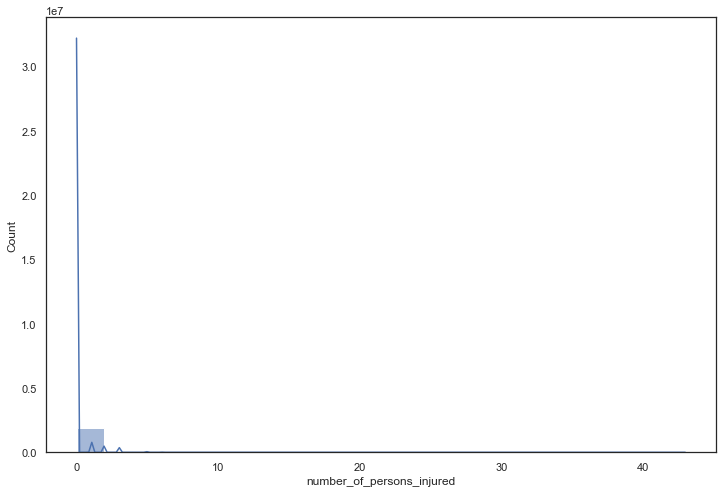

In [289]:
sns.set(style='white')
plt.figure(figsize=(12, 8))
sns.histplot(data=c1, kde=True, x="number_of_persons_injured")

In [14]:
c1.number_of_persons_injured.describe()

count    2.044323e+06
mean     3.060196e-01
std      6.966399e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.300000e+01
Name: number_of_persons_injured, dtype: float64

In [15]:
c1.number_of_persons_killed.describe()

count    2.044310e+06
mean     1.469444e-03
std      4.035728e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.000000e+00
Name: number_of_persons_killed, dtype: float64

we can see that the majority of the values and the mean of above columns is 0, so we can fill the values of those columns with 0

In [16]:
c1.number_of_persons_injured.fillna(0, inplace=True)
c1.number_of_persons_killed.fillna(0, inplace=True)

In [17]:
per_null(c1)

crash_date                        0.000000
crash_time                        0.000000
borough                          31.108900
zip_code                         31.120884
latitude                         11.331476
longitude                        11.331476
location                         11.331476
on_street_name                   21.131113
cross_street_name                37.599451
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.319810
contributing_factor_vehicle_2    15.354043
collision_id                      0.000000
vehicle_type_code_1               0.641429
vehicle_type_code_2              18.858644
dtype: float64

### Handling missing values - Removing rows with null values

Now let us check the columns "contributing factor vehicle 1" and "vehicle type code 1"

In [18]:
r = c1.contributing_factor_vehicle_1.value_counts().index
v = c1.contributing_factor_vehicle_1.value_counts().values

for i in range(len(r)):
    print("{} : {}".format(r[i], v[i]))

Unspecified : 699078
Driver Inattention/Distraction : 407732
Failure to Yield Right-of-Way : 121007
Following Too Closely : 109064
Backing Unsafely : 75783
Other Vehicular : 63471
Passing or Lane Usage Improper : 56571
Passing Too Closely : 50683
Turning Improperly : 50544
Fatigued/Drowsy : 47370
Unsafe Lane Changing : 40205
Traffic Control Disregarded : 36015
Driver Inexperience : 31871
Unsafe Speed : 27884
Alcohol Involvement : 22117
Lost Consciousness : 20421
Reaction to Uninvolved Vehicle : 19794
Pavement Slippery : 19413
Prescription Medication : 15411
View Obstructed/Limited : 13440
Outside Car Distraction : 12728
Oversized Vehicle : 12446
Aggressive Driving/Road Rage : 9521
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion : 9427
Physical Disability : 9351
Passenger Distraction : 7991
Brakes Defective : 6838
Fell Asleep : 5572
Obstruction/Debris : 4213
Glare : 4057
Failure to Keep Right : 3273
Steering Failure : 2843
Tire Failure/Inadequate : 2492
Pavement Defective : 2431
O

In [19]:
c1.contributing_factor_vehicle_1.describe()

count         2037803
unique             61
top       Unspecified
freq           699078
Name: contributing_factor_vehicle_1, dtype: object

Since the most common is unspecified and the % of missing values is very low, so it is better to remove the null values.

In [20]:
c1.dropna(subset=['contributing_factor_vehicle_1'], inplace=True)

In [21]:
c1.vehicle_type_code_1.value_counts()[c1.vehicle_type_code_1.value_counts()>10000]

Sedan                                  561890
Station Wagon/Sport Utility Vehicle    442315
PASSENGER VEHICLE                      415498
SPORT UTILITY / STATION WAGON          179932
Taxi                                    50620
4 dr sedan                              40128
Pick-up Truck                           33930
TAXI                                    31800
VAN                                     25184
Box Truck                               23839
OTHER                                   22879
Bus                                     20876
UNKNOWN                                 19903
Bike                                    14457
LARGE COM VEH(6 OR MORE TIRES)          14318
BUS                                     13933
SMALL COM VEH(4 TIRES)                  13138
PICK-UP TRUCK                           11468
LIVERY VEHICLE                          10444
Tractor Truck Diesel                    10157
Name: vehicle_type_code_1, dtype: int64

In [22]:
c1.vehicle_type_code_1.describe()

count     2028502
unique       1587
top         Sedan
freq       561890
Name: vehicle_type_code_1, dtype: object

The vehicle type has very less missing values, so we can remove the rows with null values

In [23]:
c1.dropna(subset=['vehicle_type_code_1'], inplace=True)

In [24]:
per_null(c1)

crash_date                        0.000000
crash_time                        0.000000
borough                          31.160383
zip_code                         31.172412
latitude                         11.345071
longitude                        11.345071
location                         11.345071
on_street_name                   21.105328
cross_street_name                37.595526
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
contributing_factor_vehicle_2    14.826212
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.296999
dtype: float64

Let us check the cross street name column and how can we handle the missing values

In [25]:
c1.cross_street_name.nunique()

20098

In [26]:
c1.cross_street_name.value_counts()

3 AVENUE                            9817
BROADWAY                            9631
2 AVENUE                            8394
5 AVENUE                            6991
3 AVENUE                            6510
                                    ... 
LOVE LANE                              1
Central Rd                             1
Foster ave                             1
1 ROAD                                 1
WEST 91 ATREET                         1
Name: cross_street_name, Length: 20098, dtype: int64

In [27]:
c1[['location', 'latitude', 'longitude']]

,location,latitude,longitude
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,"(40.667202, -73.8665)",40.667202,-73.866500
5,NaN,NaN,NaN
...,...,...,...
2044336,"(40.866806, -73.93101)",40.866806,-73.931010
2044337,"(40.844177, -73.90292)",40.844177,-73.902920
2044338,"(40.711033, -74.01454)",40.711033,-74.014540
2044339,"(40.69158, -73.79319)",40.691580,-73.793190


### Modifing the dataframe to remove unnecessary columns

The column location is just combination of latitude and longitude, so we can drop that column

In [28]:
c2 = c1.drop(['location'], axis=1)
c2.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,2.0,0.0,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.8665,NaN,NaN,0.0,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,0.0,0.0,...,0,0,0,0,0,Unspecified,Unspecified,4407458,Dump,Sedan


In [29]:
per_null(c2)

crash_date                        0.000000
crash_time                        0.000000
borough                          31.160383
zip_code                         31.172412
latitude                         11.345071
longitude                        11.345071
on_street_name                   21.105328
cross_street_name                37.595526
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
contributing_factor_vehicle_2    14.826212
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.296999
dtype: float64

In [30]:
(c2[c2.latitude.isna()][['latitude', 'longitude']].isna().sum()/c2.shape[0])*100

latitude     11.345071
longitude    11.345071
dtype: float64

so the latitude and longitude are missing togather, let us see if we can fill these values or remove them.

In [31]:
c2.latitude.nunique()

125925

In [32]:
c2.latitude.max()

43.344444

In [33]:
c2.latitude.min()

0.0

In [34]:
c2.latitude.value_counts()

0.000000     4226
40.861862     863
40.696033     750
40.804700     686
40.608757     670
             ... 
40.550896       1
40.577440       1
40.569662       1
40.690021       1
40.723581       1
Name: latitude, Length: 125925, dtype: int64

## Handling outliers

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


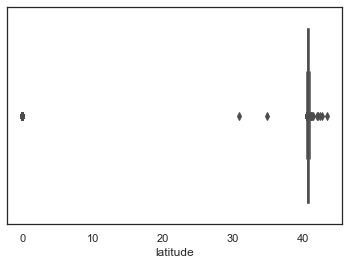

In [284]:
sns.boxplot(c2.latitude)

In [35]:
mean = c2.latitude.mean()
std = c2.latitude.std()
lat_ll = mean - (std)
lat_ul = mean + (std)
print(lat_ll, lat_ul)

38.65500106617252 42.601836938042425


In [36]:
lat1 = c2.latitude[(c2.latitude >= lat_ll)&(c2.latitude <= lat_ul)]
lat1

3          40.667202
6          40.709183
7          40.868160
8          40.671720
9          40.751440
             ...    
2044336    40.866806
2044337    40.844177
2044338    40.711033
2044339    40.691580
2044340    40.700240
Name: latitude, Length: 1794137, dtype: float64

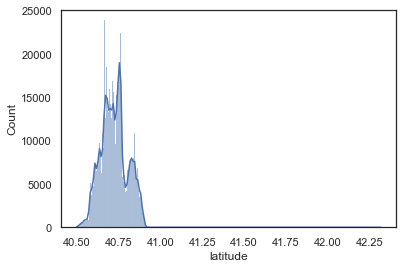

In [37]:
sns.histplot(lat1, kde=True)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


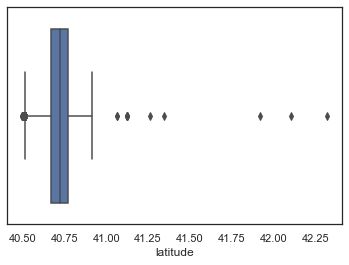

In [38]:
sns.boxplot(lat1)

In [39]:
lat1.describe()

count    1.794137e+06
mean     4.072412e+01
std      7.907072e-02
min      4.049895e+01
25%      4.066830e+01
50%      4.072119e+01
75%      4.076968e+01
max      4.231832e+01
Name: latitude, dtype: float64

The below plot clearly shows that there are outliers i.e latitude 0, but the latitude 0.0 does not come under new york, so we can remove those points. Let us check the longitude column similarly

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


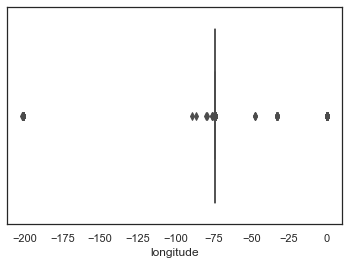

In [40]:
sns.boxplot(c2.longitude)

In [44]:
c2.longitude.describe()

count    1.798367e+06
mean    -7.375355e+01
std      3.713753e+00
min     -2.013600e+02
25%     -7.397492e+01
50%     -7.392729e+01
75%     -7.386665e+01
max      0.000000e+00
Name: longitude, dtype: float64

In [45]:
std = c2.longitude.std()
mean = c2.longitude.mean()
lon_ll = mean - std
lon_ul = mean + std
print(lon_ll, lon_ul)

-77.46730761960839 -70.0398007911227


C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


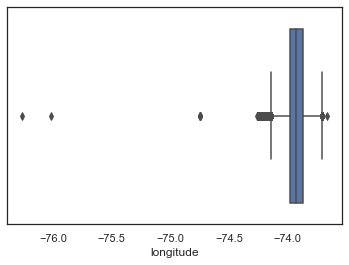

In [46]:
lon = c2.longitude[(c2.longitude>lon_ll) & (c2.longitude<lon_ul)]
sns.boxplot(lon)

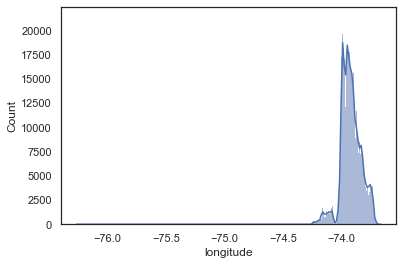

In [47]:
sns.histplot(lon, kde=True)

Use the below map to check the outliers and eliminated them based on latitude and longitude

In [48]:
m = folium.Map(location=[c2.latitude.mean(), c2.longitude.mean()], zoom_start=10)
folium.LatLngPopup().add_to(m)

m

Created new dataframe after removing ourliers and null values

In [49]:
c3 = c2[(c2.longitude>lon_ll) & (c2.longitude<lon_ul) & (c2.latitude >= lat_ll)&(c2.latitude <= lat_ul)]

In [50]:
c3.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,NaN,NaN,0.0,0.0,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,NaN,0.0,0.0,...,0,0,0,0,0,Passing Too Closely,Unspecified,4486555,Sedan,Tractor Truck Diesel
7,12/14/2021,8:17,BRONX,10475,40.868160,-73.831480,NaN,NaN,2.0,0.0,...,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan
8,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,NaN,NaN,0.0,0.0,...,0,0,0,0,0,Driver Inexperience,Unspecified,4487074,Sedan,NaN
9,12/14/2021,14:58,MANHATTAN,10017,40.751440,-73.973970,3 AVENUE,EAST 43 STREET,0.0,0.0,...,0,0,0,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle


In [51]:
per_null(c3)

crash_date                        0.000000
crash_time                        0.000000
borough                          24.345447
zip_code                         24.357654
latitude                          0.000000
longitude                         0.000000
on_street_name                   20.687554
cross_street_name                37.316494
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
contributing_factor_vehicle_2    15.096730
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.788068
dtype: float64

In [52]:
per_null(c2)

crash_date                        0.000000
crash_time                        0.000000
borough                          31.160383
zip_code                         31.172412
latitude                         11.345071
longitude                        11.345071
on_street_name                   21.105328
cross_street_name                37.595526
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
contributing_factor_vehicle_2    14.826212
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.296999
dtype: float64

In [53]:
c2.shape

(2028502, 21)

In [54]:
c3.shape

(1794011, 21)

### There are still few null values, let us check if we can handle them

In [55]:
c3.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'on_street_name', 'cross_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2'],
      dtype='object')

Trying to check if we can fill the zipcode field based on latitude and longitude values

In [56]:
c3.zip_code.value_counts()

11207.0    19328
11236.0    14055
11203.0    12775
11234.0    12711
11385.0    12485
           ...  
10120          1
10166.0        1
11241.0        1
10153          1
10048          1
Name: zip_code, Length: 425, dtype: int64

In [57]:
c3[c3.zip_code==11207].borough.value_counts()

BROOKLYN    19328
Name: borough, dtype: int64

In [58]:
c3[c3.borough=='BROOKLYN'].latitude.min()

40.552966999999995

In [59]:
c3[c3.borough=='BROOKLYN'].longitude.min()

-74.1946

In [60]:
c3[c3.borough=='BROOKLYN'].latitude.max()

41.12615

In [61]:
c3[c3.borough=='BROOKLYN'].longitude.max()

-73.71353

In [62]:
c3[((c3.latitude<=41.12615) & (c3.latitude>=40.552966999999995)) & ((c3.longitude<=-73.71353) & (c3.longitude>=-74.1946))].borough.value_counts()

BROOKLYN         432539
QUEENS           362368
MANHATTAN        303551
BRONX            198722
STATEN ISLAND     44739
Name: borough, dtype: int64

In [63]:
c3[c3.borough=='QUEENS'].latitude.min()

40.55174

In [64]:
c3[c3.borough=='QUEENS'].latitude.max()

40.90267

In [65]:
c3.zip_code.nunique()

425

In [66]:
c3[c3.borough=='BROOKLYN'].zip_code

3          11208
8          11207
15         11217
16         11226
25         11230
           ...  
2044324    11207
2044326    11222
2044329    11203
2044330    11205
2044331    11249
Name: zip_code, Length: 432539, dtype: object

### Trying to check if the zipcode can be used to predict the borough, by checking the min and max of each borough, but first we need to convert this column into float or int, then we will fill the values in borough based on the zipcode column

In [68]:
def object_to_int(x):
    if type(x) == str and x.strip()=="":
        return None
    return float(x)
c3['zip_code'] = c3.zip_code.apply(object_to_int)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
c3.dtypes

crash_date                        object
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
on_street_name                    object
cross_street_name                 object
number_of_persons_injured        float64
number_of_persons_killed         float64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
collision_id                       int64
vehicle_type_code_1               object
vehicle_type_code_2               object
dtype: object

In [70]:
c3.borough.value_counts()

BROOKLYN         432539
QUEENS           365497
MANHATTAN        303551
BRONX            198723
STATEN ISLAND     56941
Name: borough, dtype: int64

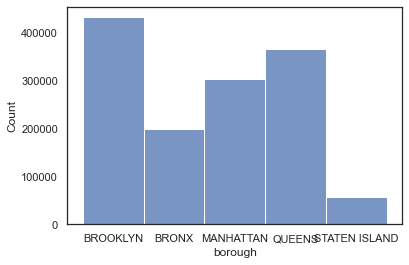

In [194]:
sns.histplot(c3.borough)

In [71]:
c3[c3.borough=='QUEENS'].zip_code.min()

11001.0

In [72]:
c3[c3.borough=='QUEENS'].zip_code.max()

11697.0

In [73]:
c3[c3.borough=='BROOKLYN'].zip_code.min()

11201.0

In [74]:
c3[c3.borough=='BROOKLYN'].zip_code.max()

11421.0

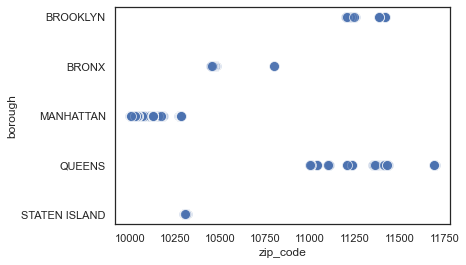

In [75]:
sns.scatterplot(x='zip_code', y='borough', data=c3, s=100, alpha=0.8)

### The above plot clearly indicates that there cannot be proper relation formed between zipcode and borough columns.

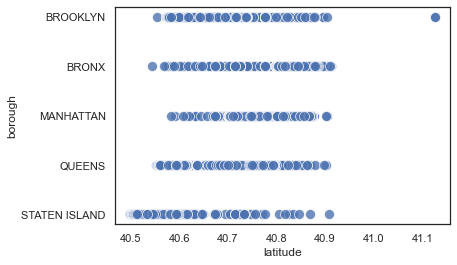

In [76]:
sns.scatterplot(x='latitude', y='borough', data=c3, s=100, alpha=0.8)

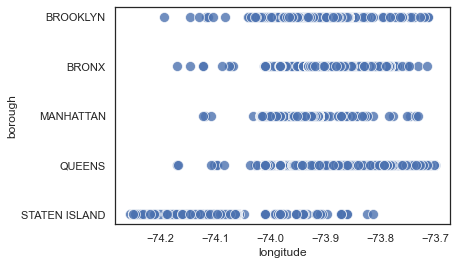

In [77]:
sns.scatterplot(x='longitude', y='borough', data=c3, s=100, alpha=0.8)

### The above plots indicates that we cannot see any relation that help us predict the values if borough based on latitude and longitude

In [78]:
per_null(c3)

crash_date                        0.000000
crash_time                        0.000000
borough                          24.345447
zip_code                         24.359996
latitude                          0.000000
longitude                         0.000000
on_street_name                   20.687554
cross_street_name                37.316494
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
contributing_factor_vehicle_2    15.096730
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.788068
dtype: float64

In [79]:
c3.contributing_factor_vehicle_2

3                                     NaN
6                             Unspecified
7                             Unspecified
8                             Unspecified
9                             Unspecified
                        ...              
2044336                       Unspecified
2044337                               NaN
2044338                               NaN
2044339    Driver Inattention/Distraction
2044340                               NaN
Name: contributing_factor_vehicle_2, Length: 1794011, dtype: object

In [80]:
c3.contributing_factor_vehicle_2.nunique()

61

In [81]:
c3.contributing_factor_vehicle_2.value_counts()

Unspecified                       1284061
Driver Inattention/Distraction      82417
Other Vehicular                     27952
Following Too Closely               15786
Failure to Yield Right-of-Way       14969
                                   ...   
Shoulders Defective/Improper           11
Eating or Drinking                      9
Windshield Inadequate                   5
Texting                                 3
1                                       2
Name: contributing_factor_vehicle_2, Length: 61, dtype: int64

It shows that the most common reason is unspecified and it does not add much value to the data, so filling the missing values is also not a right decision, so we will remove this entire column

In [82]:
c3.drop(['contributing_factor_vehicle_2'], axis=1, inplace=True)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
per_null(c3)

crash_date                        0.000000
crash_time                        0.000000
borough                          24.345447
zip_code                         24.359996
latitude                          0.000000
longitude                         0.000000
on_street_name                   20.687554
cross_street_name                37.316494
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.788068
dtype: float64

In [84]:
c3.vehicle_type_code_2.value_counts()

Sedan                                  362600
Station Wagon/Sport Utility Vehicle    290825
PASSENGER VEHICLE                      263203
SPORT UTILITY / STATION WAGON          116732
UNKNOWN                                 69877
                                        ...  
FireT                                       1
M/A                                         1
Access a R                                  1
INTERNATIO                                  1
SchooL bus                                  1
Name: vehicle_type_code_2, Length: 1666, dtype: int64

### cleary no relationship between lat, lon and zipcode, borough.

### Trying to see if we can find any relation between latitude, longitude with the street name

In [86]:
s = c3.on_street_name.value_counts().head(5).index
filtered_c3 = c3[c3['on_street_name'].isin(s)]
filtered_c3.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2
154116,03/17/2021,1:00,BROOKLYN,11207.0,40.677357,-73.886870,ATLANTIC AVENUE,WARWICK STREET,1.0,0.0,0,0,0,0,1,0,Unsafe Speed,4399717,Pick-up Truck,Sedan
154230,03/22/2021,13:06,BROOKLYN,11217.0,40.687770,-73.987010,ATLANTIC AVENUE,HOYT STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,4400881,Sedan,Station Wagon/Sport Utility Vehicle
154245,03/23/2021,15:00,NaN,NaN,40.603010,-74.016884,BELT PARKWAY,NaN,1.0,0.0,0,0,0,0,1,0,Aggressive Driving/Road Rage,4401282,Station Wagon/Sport Utility Vehicle,Sedan
154293,02/14/2021,14:38,NaN,NaN,40.583057,-73.973114,BELT PARKWAY,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,4391802,Sedan,Station Wagon/Sport Utility Vehicle
154296,03/28/2021,0:20,NaN,NaN,40.653550,-73.862320,BELT PARKWAY,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Speed,4402487,Station Wagon/Sport Utility Vehicle,NaN


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

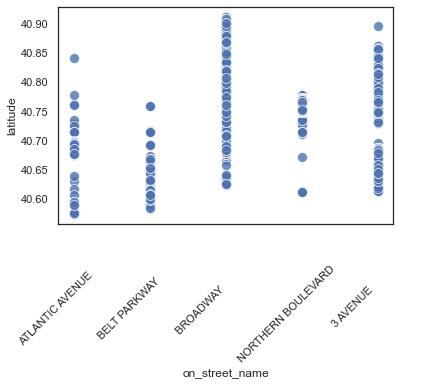

In [87]:
sns.scatterplot(x='on_street_name', y='latitude', data=filtered_c3, s=100, alpha=0.8)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

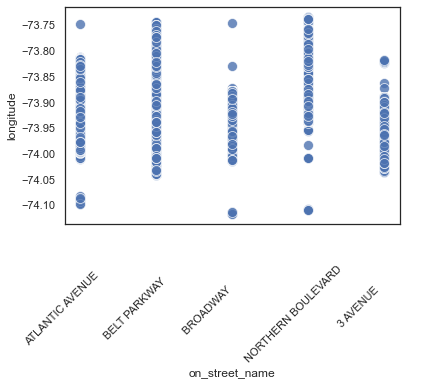

In [88]:
sns.scatterplot(x='on_street_name', y='longitude', data=filtered_c3, s=100, alpha=0.8)
plt.xticks(rotation=45)

The above plots show that there is no relation between street name and latitude or longitude, In below, trying to check if we can find any relation ship between streetname, zipcode so thaat it can help in fillinf the null values

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

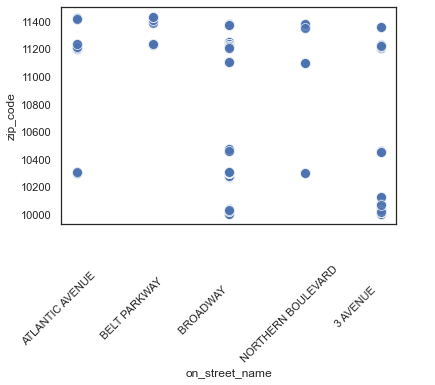

In [89]:
sns.scatterplot(x='on_street_name', y='zip_code', data=filtered_c3, s=100, alpha=0.8)
plt.xticks(rotation=45)

In [90]:
per_null(c3)

crash_date                        0.000000
crash_time                        0.000000
borough                          24.345447
zip_code                         24.359996
latitude                          0.000000
longitude                         0.000000
on_street_name                   20.687554
cross_street_name                37.316494
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.788068
dtype: float64

In [91]:
c3.drop(['cross_street_name'], axis=1, inplace=True)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
per_null(c3)

crash_date                        0.000000
crash_time                        0.000000
borough                          24.345447
zip_code                         24.359996
latitude                          0.000000
longitude                         0.000000
on_street_name                   20.687554
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.000000
collision_id                      0.000000
vehicle_type_code_1               0.000000
vehicle_type_code_2              18.788068
dtype: float64

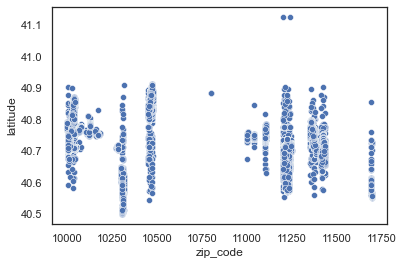

In [93]:
sns.scatterplot(y='latitude', x='zip_code', data=c3)

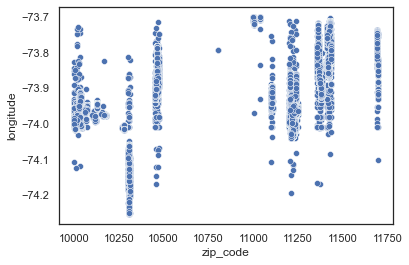

In [94]:
sns.scatterplot(y='longitude', x='zip_code', data=c3)

We can see there is no proper relation between the zip_code and latitude, longitude

## Since we cannot fill the null values, dropping will also lead us to loose information, so instead let us go with the null values for now.

Now let us again look at the remainign columns and their data types

In [95]:
c3.dtypes

crash_date                        object
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
on_street_name                    object
number_of_persons_injured        float64
number_of_persons_killed         float64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
collision_id                       int64
vehicle_type_code_1               object
vehicle_type_code_2               object
dtype: object

we can see that collision id is just another column similar to index, so we can drop that. Also the crash date and crash time are in object datatype, so let us convert them to datetime datatype

In [96]:
c3['crash_datetime'] = pd.to_datetime(c3['crash_date'] + ' ' + c3['crash_time'])

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
c3.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_datetime
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,4456314,Sedan,NaN,2021-09-11 09:35:00
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4486555,Sedan,Tractor Truck Diesel,2021-12-14 17:05:00
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,NaN,2.0,0.0,0,0,0,0,2,0,Unspecified,4486660,Sedan,Sedan,2021-12-14 08:17:00
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inexperience,4487074,Sedan,NaN,2021-12-14 21:10:00
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,3 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021-12-14 14:58:00


In [98]:
c3['day_of_week'] = c3.crash_datetime.dt.day_name()

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Exploratory Data Analysis

In [99]:
day_crashes = c3.groupby('day_of_week').size().reset_index(name='crash_count')
day_crashes

,day_of_week,crash_count
0,Friday,286357
1,Monday,256222
2,Saturday,242332
3,Sunday,215397
4,Thursday,267964
5,Tuesday,264123
6,Wednesday,261616


## Day of Week vs Crash Count

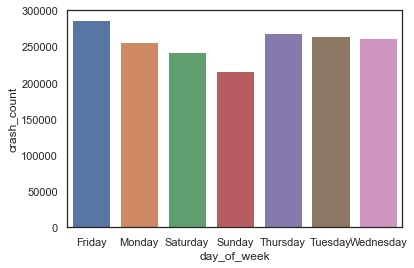

In [100]:
sns.barplot(x='day_of_week', y='crash_count', data=day_crashes)

In [101]:
c3['hour_of_day'] = c3.crash_datetime.dt.hour

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Hour of Day vs Crash_count

In [102]:
hour_crashes = c3.groupby('hour_of_day').size().reset_index(name='crash_count')
hour_crashes

,hour_of_day,crash_count
0,0,57886
1,1,30907
2,2,23800
3,3,20855
4,4,23489
5,5,25430
6,6,39406
7,7,54169
8,8,98530
9,9,95242


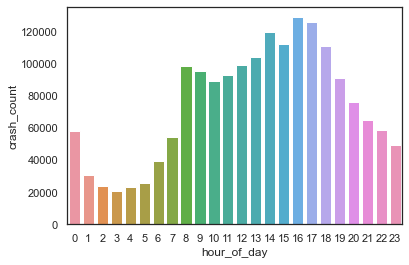

In [103]:
sns.barplot(x='hour_of_day', y='crash_count', data=hour_crashes)

## Injured_per_hour vs Hour of Day

In [104]:
injured_hour = c3.groupby('hour_of_day').number_of_persons_injured.sum().reset_index(name='total_injuries')
injured_hour

,hour_of_day,total_injuries
0,0,20279.0
1,1,11118.0
2,2,8975.0
3,3,7955.0
4,4,9261.0
5,5,8747.0
6,6,12322.0
7,7,17025.0
8,8,26368.0
9,9,22770.0


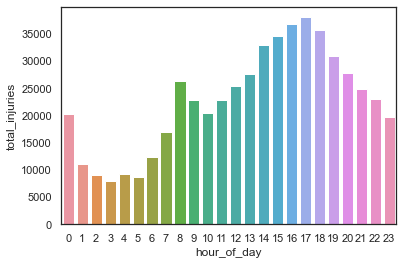

In [105]:
sns.barplot(x='hour_of_day', y='total_injuries', data=injured_hour)

## Killed_per_hour vs Hour of Day

In [106]:
killed_hour = c3.groupby('hour_of_day').number_of_persons_killed.sum().reset_index(name='total_deaths')
killed_hour

,hour_of_day,total_deaths
0,0,132.0
1,1,89.0
2,2,91.0
3,3,101.0
4,4,146.0
5,5,104.0
6,6,101.0
7,7,71.0
8,8,69.0
9,9,75.0


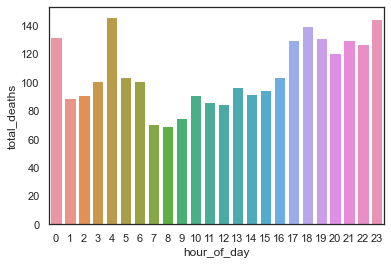

In [107]:
sns.barplot(x='hour_of_day', y='total_deaths', data=killed_hour)

## Injured_per_Day vs Day of Week

In [108]:
injured_day = c3.groupby('day_of_week').number_of_persons_injured.sum().reset_index(name='total_injuries')
injured_day

,day_of_week,total_injuries
0,Friday,84501.0
1,Monday,75813.0
2,Saturday,78635.0
3,Sunday,73698.0
4,Thursday,78284.0
5,Tuesday,77870.0
6,Wednesday,76965.0


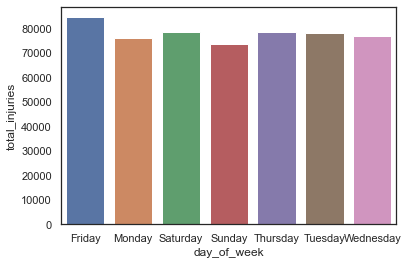

In [109]:
sns.barplot(x='day_of_week', y='total_injuries', data=injured_day)

## Killed_per_Day vs Hour of Day

In [110]:
killed_day = c3.groupby('day_of_week').number_of_persons_killed.sum().reset_index(name='total_deaths')
killed_day

,day_of_week,total_deaths
0,Friday,384.0
1,Monday,369.0
2,Saturday,412.0
3,Sunday,397.0
4,Thursday,345.0
5,Tuesday,339.0
6,Wednesday,307.0


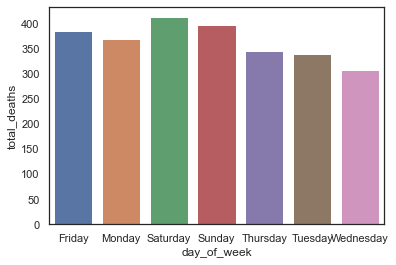

In [111]:
sns.barplot(x='day_of_week', y='total_deaths', data=killed_day)

let us only consider weekedns and see the relation between time and no of accidents, time and no of deaths, time and no of injuries
only consider weekdays and do the above analysis

### Weekend crashes analysis

In [112]:
weekend_crashes = c3[(c3.crash_datetime.dt.dayofweek==5) | (c3.crash_datetime.dt.dayofweek == 6)]
weekend_crashes

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_datetime,day_of_week,hour_of_day
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,NaN,0.0,0.0,0,...,0,0,0,Unspecified,4456314,Sedan,NaN,2021-09-11 09:35:00,Saturday,9
18,12/11/2021,19:43,BRONX,10463.0,40.872620,-73.904686,WEST KINGSBRIDGE ROAD,1.0,0.0,0,...,0,1,0,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,Sedan,2021-12-11 19:43:00,Saturday,19
20,12/11/2021,4:45,MANHATTAN,10001.0,40.748917,-73.993546,NaN,0.0,0.0,0,...,0,0,0,Following Too Closely,4486905,Station Wagon/Sport Utility Vehicle,NaN,2021-12-11 04:45:00,Saturday,4
30,12/12/2021,9:00,QUEENS,11385.0,40.704470,-73.901480,NaN,0.0,0.0,0,...,0,0,0,Passing Too Closely,4486933,Station Wagon/Sport Utility Vehicle,NaN,2021-12-12 09:00:00,Sunday,9
40,04/24/2022,16:45,NaN,NaN,40.607685,-74.138920,STATEN ISLAND EXPRESSWAY,1.0,0.0,0,...,0,1,0,Driver Inattention/Distraction,4521660,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2022-04-24 16:45:00,Sunday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044331,07/22/2023,11:00,BROOKLYN,11249.0,40.717022,-73.965270,KENT AVENUE,1.0,0.0,0,...,0,0,0,Passing Too Closely,4648297,Bike,Sedan,2023-07-22 11:00:00,Saturday,11
2044337,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,EAST 174 STREET,1.0,0.0,1,...,0,0,0,Unspecified,4648117,Sedan,NaN,2023-07-22 21:39:00,Saturday,21
2044338,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,WEST STREET,0.0,0.0,0,...,0,0,0,Driver Inattention/Distraction,4648366,Taxi,NaN,2023-07-02 17:55:00,Sunday,17
2044339,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,110 AVENUE,1.0,0.0,0,...,0,0,0,Driver Inattention/Distraction,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,2023-07-22 13:15:00,Saturday,13


In [113]:
weekend_hour_of_day = weekend_crashes.groupby('hour_of_day').size().reset_index(name='total_crashes')
weekend_hour_of_day

,hour_of_day,total_crashes
0,0,21341
1,1,14377
2,2,11962
3,3,11234
4,4,12532
5,5,9996
6,6,8496
7,7,8045
8,8,13062
9,9,15402


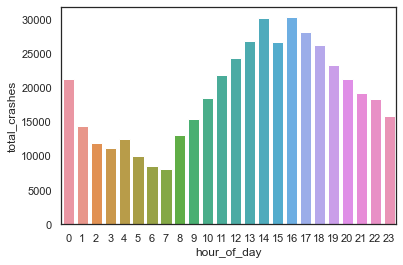

In [114]:
sns.barplot(x='hour_of_day', y='total_crashes', data=weekend_hour_of_day)

In [115]:
weekend_injuries_hour = weekend_crashes.groupby('hour_of_day').number_of_persons_injured.sum().reset_index(name='total_injuries')
weekend_injuries_hour

,hour_of_day,total_injuries
0,0,7583.0
1,1,5151.0
2,2,4786.0
3,3,4548.0
4,4,5256.0
5,5,3611.0
6,6,2918.0
7,7,2626.0
8,8,3460.0
9,9,4021.0


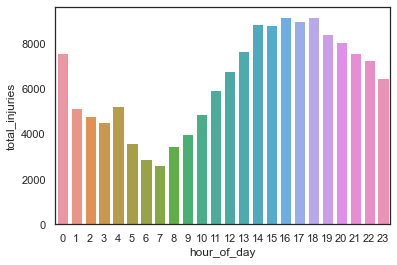

In [116]:
sns.barplot(x='hour_of_day', y='total_injuries', data=weekend_injuries_hour)

In [117]:
weekend_deaths_hour = weekend_crashes.groupby('hour_of_day').number_of_persons_killed.sum().reset_index(name='total_deaths')
weekend_deaths_hour

,hour_of_day,total_deaths
0,0,43.0
1,1,31.0
2,2,53.0
3,3,61.0
4,4,70.0
5,5,39.0
6,6,18.0
7,7,18.0
8,8,15.0
9,9,16.0


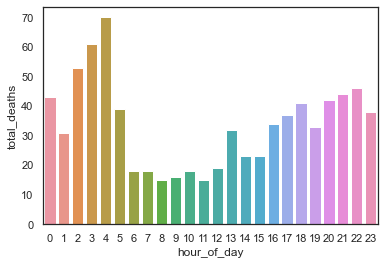

In [118]:
sns.barplot(x='hour_of_day', y='total_deaths', data=weekend_deaths_hour)

### Weekday crash analysis

In [119]:
weekday_crashes = c3[~(c3.crash_datetime.dt.dayofweek==5) & ~(c3.crash_datetime.dt.dayofweek == 6)]
weekday_crashes

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_datetime,day_of_week,hour_of_day
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,...,0,0,0,Passing Too Closely,4486555,Sedan,Tractor Truck Diesel,2021-12-14 17:05:00,Tuesday,17
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,NaN,2.0,0.0,0,...,0,2,0,Unspecified,4486660,Sedan,Sedan,2021-12-14 08:17:00,Tuesday,8
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,NaN,0.0,0.0,0,...,0,0,0,Driver Inexperience,4487074,Sedan,NaN,2021-12-14 21:10:00,Tuesday,21
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,3 AVENUE,0.0,0.0,0,...,0,0,0,Passing Too Closely,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021-12-14 14:58:00,Tuesday,14
10,12/13/2021,0:34,NaN,NaN,40.701275,-73.888870,MYRTLE AVENUE,0.0,0.0,0,...,0,0,0,Passing or Lane Usage Improper,4486934,Station Wagon/Sport Utility Vehicle,NaN,2021-12-13 00:34:00,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044329,07/20/2023,14:59,BROOKLYN,11203.0,40.641950,-73.932274,SCHENECTADY AVENUE,0.0,0.0,0,...,0,0,0,Unspecified,4648122,Van,PK,2023-07-20 14:59:00,Thursday,14
2044330,07/21/2023,13:35,BROOKLYN,11205.0,40.694603,-73.961240,NaN,0.0,0.0,0,...,0,0,0,Unspecified,4648272,Sedan,Pick-up Truck,2023-07-21 13:35:00,Friday,13
2044333,07/13/2023,21:30,MANHATTAN,10027.0,40.814323,-73.951180,NaN,0.0,0.0,0,...,0,0,0,Unspecified,4648334,Sedan,NaN,2023-07-13 21:30:00,Thursday,21
2044335,06/16/2023,0:00,NaN,NaN,40.854310,-73.930090,WEST 189 STREET,1.0,0.0,1,...,0,0,0,Backing Unsafely,4648255,Station Wagon/Sport Utility Vehicle,NaN,2023-06-16 00:00:00,Friday,0


In [120]:
weekday_hour_of_day = weekday_crashes.groupby('hour_of_day').size().reset_index(name='total_crashes')
weekday_hour_of_day

,hour_of_day,total_crashes
0,0,36545
1,1,16530
2,2,11838
3,3,9621
4,4,10957
5,5,15434
6,6,30910
7,7,46124
8,8,85468
9,9,79840


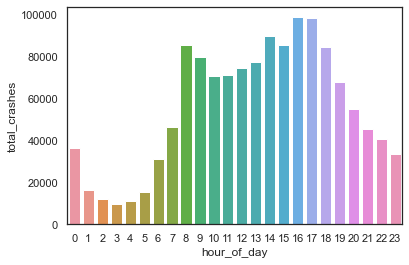

In [121]:
sns.barplot(x='hour_of_day', y='total_crashes', data=weekday_hour_of_day)

In [122]:
weekday_injuries_hour = weekday_crashes.groupby('hour_of_day').number_of_persons_injured.sum().reset_index(name='total_injuries')
weekday_injuries_hour

,hour_of_day,total_injuries
0,0,12696.0
1,1,5967.0
2,2,4189.0
3,3,3407.0
4,4,4005.0
5,5,5136.0
6,6,9404.0
7,7,14399.0
8,8,22908.0
9,9,18749.0


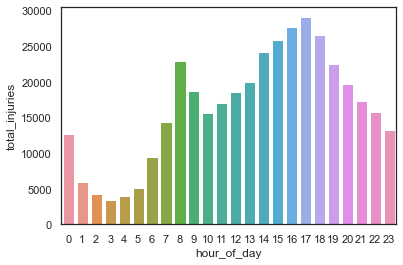

In [123]:
sns.barplot(x='hour_of_day', y='total_injuries', data=weekday_injuries_hour)

In [124]:
weekday_deaths_hour = weekday_crashes.groupby('hour_of_day').number_of_persons_killed.sum().reset_index(name='total_deaths')
weekday_deaths_hour

,hour_of_day,total_deaths
0,0,89.0
1,1,58.0
2,2,38.0
3,3,40.0
4,4,76.0
5,5,65.0
6,6,83.0
7,7,53.0
8,8,54.0
9,9,59.0


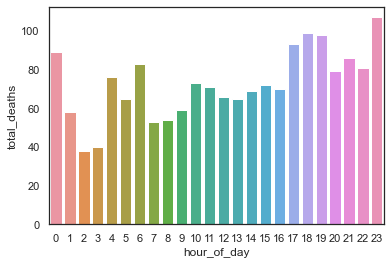

In [125]:
sns.barplot(x='hour_of_day', y='total_deaths', data=weekday_deaths_hour)

In [213]:
c3.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_datetime,day_of_week,hout_od_day
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,NaN,0.0,0.0,0,...,0,0,0,Unspecified,4456314,Sedan,NaN,2021-09-11 09:35:00,Saturday,9
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,...,0,0,0,Passing Too Closely,4486555,Sedan,Tractor Truck Diesel,2021-12-14 17:05:00,Tuesday,17
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,NaN,2.0,0.0,0,...,0,2,0,Unspecified,4486660,Sedan,Sedan,2021-12-14 08:17:00,Tuesday,8
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,NaN,0.0,0.0,0,...,0,0,0,Driver Inexperience,4487074,Sedan,NaN,2021-12-14 21:10:00,Tuesday,21
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,3 AVENUE,0.0,0.0,0,...,0,0,0,Passing Too Closely,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021-12-14 14:58:00,Tuesday,14


In [129]:
c3.drop(['crash_date', 'crash_time'], axis=1, inplace=True)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [130]:
c3.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'crash_datetime', 'day_of_week', 'hour_of_day'],
      dtype='object')

In [133]:
c3['is_weekend'] = (c3.crash_datetime.dt.dayofweek>=5).astype(int)

C:\Users\Venkat\anaconda3\envs\Tensor Flow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


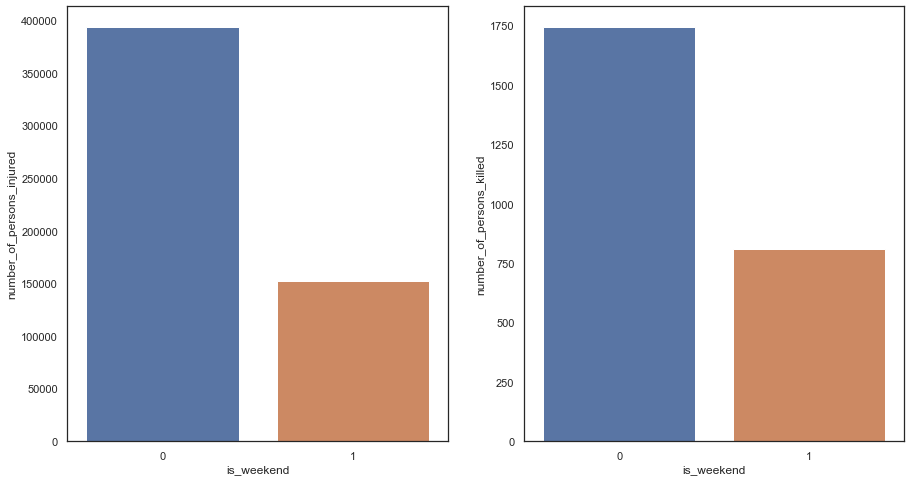

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='is_weekend', y='number_of_persons_injured', data=c3, estimator=sum, ci=None, label="injured", ax=axes[0])
sns.barplot(x='is_weekend', y='number_of_persons_killed', data=c3, estimator=sum, ci=None, label="killed", ax=axes[1])

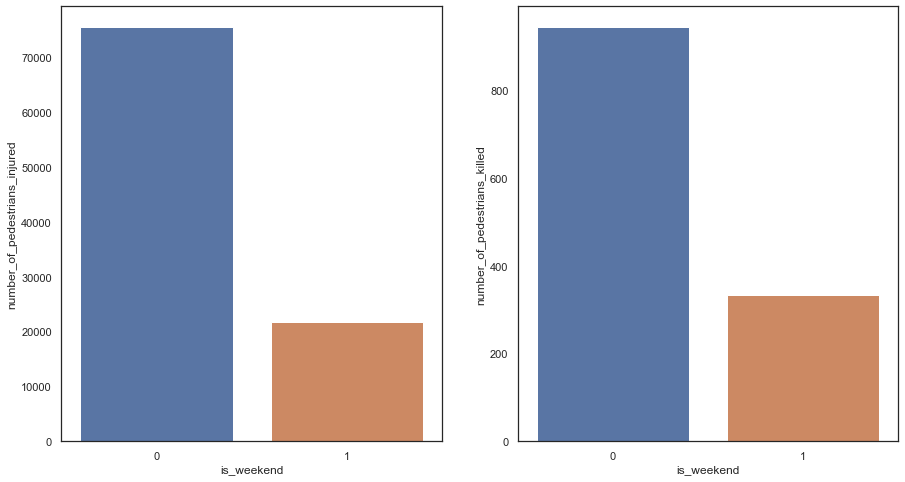

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='is_weekend', y='number_of_pedestrians_injured', data=c3, estimator=sum, ci=None, label='injured', ax=axes[0])
sns.barplot(x='is_weekend', y='number_of_pedestrians_killed', data=c3, estimator=sum, ci=None, label='killed', ax=axes[1])

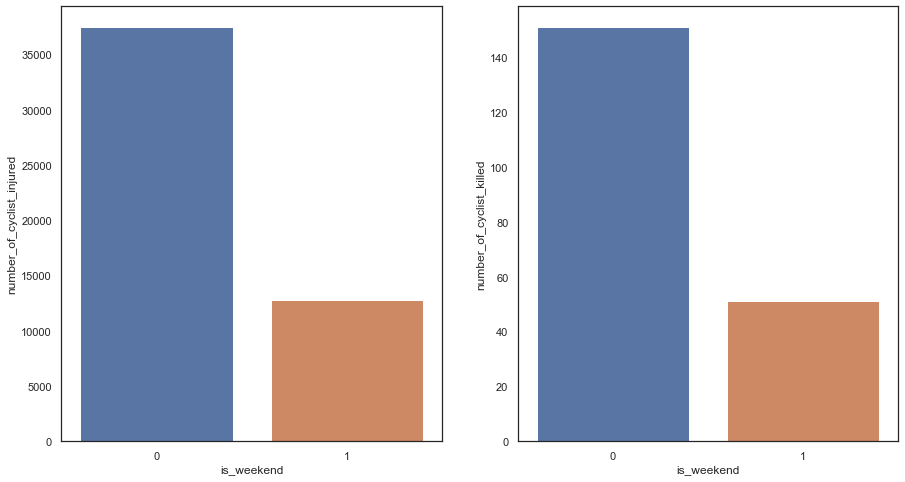

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='is_weekend', y='number_of_cyclist_injured', data=c3, estimator=sum, ci=None, label='injured', ax=axes[0])
sns.barplot(x='is_weekend', y='number_of_cyclist_killed', data=c3, estimator=sum, ci=None, label='killed', ax=axes[1])

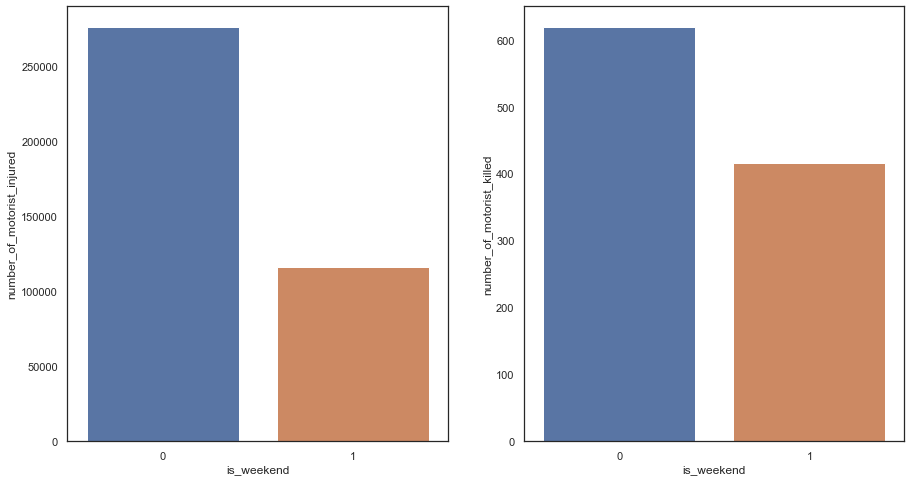

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='is_weekend', y='number_of_motorist_injured', data=c3, estimator=sum, ci=None, label='injured', ax=axes[0])
sns.barplot(x='is_weekend', y='number_of_motorist_killed', data=c3, estimator=sum, ci=None, label='killed', ax=axes[1])

In [179]:
ped_injured = c3.groupby('hour_of_day').number_of_pedestrians_injured.sum().reset_index(name="injured_pedestrians")
ped_injured

,hour_of_day,injured_pedestrians
0,0,2516
1,1,1093
2,2,859
3,3,729
4,4,867
5,5,999
6,6,2274
7,7,3247
8,8,5418
9,9,4313


In [180]:
ped_killed = c3.groupby('hour_of_day').number_of_pedestrians_killed.sum().reset_index(name="killed_pedestrians")
ped_killed

,hour_of_day,killed_pedestrians
0,0,51
1,1,25
2,2,31
3,3,32
4,4,49
5,5,52
6,6,61
7,7,35
8,8,45
9,9,46


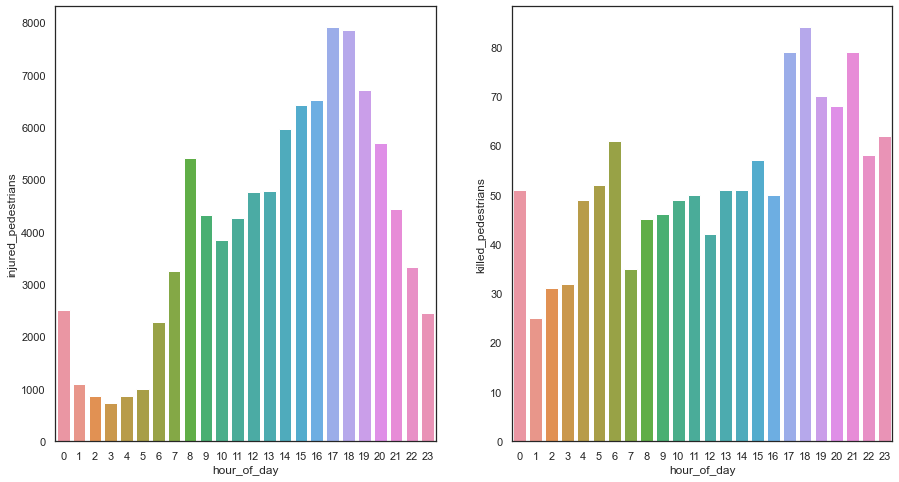

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='hour_of_day', y='injured_pedestrians', data=ped_injured, ax=axes[0])
sns.barplot(x='hour_of_day', y='killed_pedestrians', data=ped_killed, ax=axes[1])

In [183]:
cyclist_injured = c3.groupby('hour_of_day').number_of_cyclist_injured.sum().reset_index(name="injured_cyclist")
cyclist_injured

,hour_of_day,injured_cyclist
0,0,1585
1,1,641
2,2,447
3,3,340
4,4,312
5,5,379
6,6,666
7,7,1194
8,8,1869
9,9,1882


In [184]:
cyclist_killed = c3.groupby('hour_of_day').number_of_cyclist_killed.sum().reset_index(name="killed_cyclist")
cyclist_killed

,hour_of_day,killed_cyclist
0,0,15
1,1,4
2,2,2
3,3,4
4,4,2
5,5,7
6,6,9
7,7,10
8,8,10
9,9,7


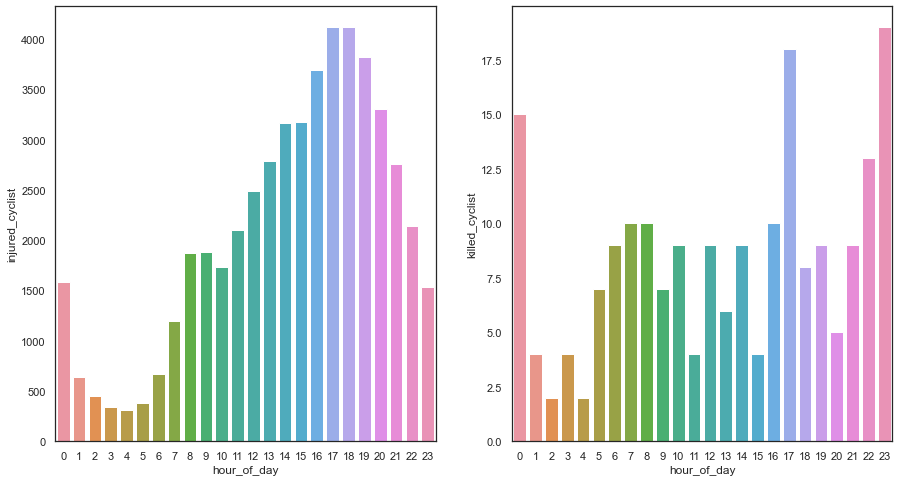

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='hour_of_day', y='injured_cyclist', data=cyclist_injured, ax=axes[0])
sns.barplot(x='hour_of_day', y='killed_cyclist', data=cyclist_killed, ax=axes[1])

In [186]:
motorist_injured = c3.groupby('hour_of_day').number_of_motorist_injured.sum().reset_index(name="injured_motorist")
motorist_injured

,hour_of_day,injured_motorist
0,0,15913
1,1,9283
2,2,7584
3,3,6830
4,4,8029
5,5,7315
6,6,9268
7,7,12406
8,8,18862
9,9,16382


In [187]:
motorist_killed = c3.groupby('hour_of_day').number_of_motorist_killed.sum().reset_index(name="killed_motorist")
motorist_killed

,hour_of_day,killed_motorist
0,0,66
1,1,59
2,2,54
3,3,64
4,4,91
5,5,45
6,6,30
7,7,23
8,8,14
9,9,23


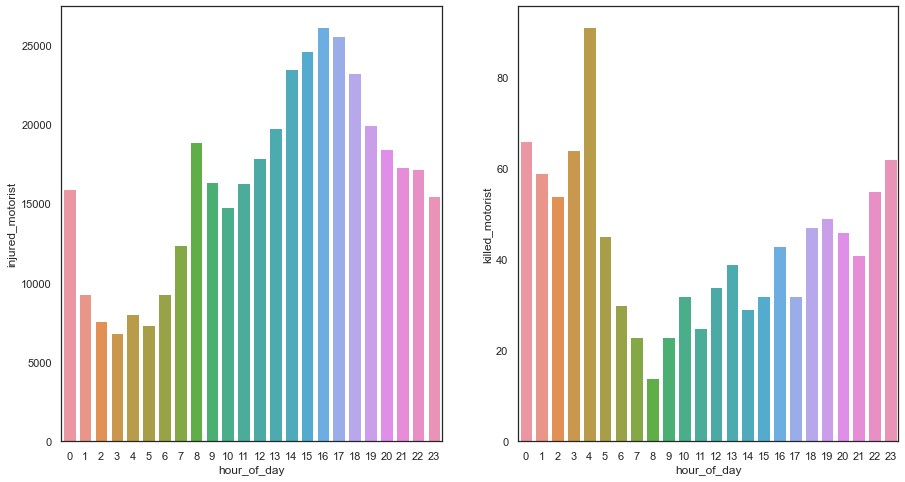

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='hour_of_day', y='injured_motorist', data=motorist_injured, ax=axes[0])
sns.barplot(x='hour_of_day', y='killed_motorist', data=motorist_killed, ax=axes[1])

In [189]:
c3.head()

,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,...,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code_1,vehicle_type_code_2,crash_datetime,day_of_week,hour_of_day,is_weekend
3,BROOKLYN,11208.0,40.667202,-73.866500,NaN,0.0,0.0,0,0,0,...,0,0,Unspecified,4456314,Sedan,NaN,2021-09-11 09:35:00,Saturday,9,1
6,NaN,NaN,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,4486555,Sedan,Tractor Truck Diesel,2021-12-14 17:05:00,Tuesday,17,0
7,BRONX,10475.0,40.868160,-73.831480,NaN,2.0,0.0,0,0,0,...,2,0,Unspecified,4486660,Sedan,Sedan,2021-12-14 08:17:00,Tuesday,8,0
8,BROOKLYN,11207.0,40.671720,-73.897100,NaN,0.0,0.0,0,0,0,...,0,0,Driver Inexperience,4487074,Sedan,NaN,2021-12-14 21:10:00,Tuesday,21,0
9,MANHATTAN,10017.0,40.751440,-73.973970,3 AVENUE,0.0,0.0,0,0,0,...,0,0,Passing Too Closely,4486519,Sedan,Station Wagon/Sport Utility Vehicle,2021-12-14 14:58:00,Tuesday,14,0


In [190]:
c3.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'crash_datetime', 'day_of_week', 'hour_of_day',
       'is_weekend'],
      dtype='object')

In [201]:
c3.borough.value_counts()

BROOKLYN         432539
QUEENS           365497
MANHATTAN        303551
BRONX            198723
STATEN ISLAND     56941
Name: borough, dtype: int64

So it clearly says more number of accidents happen in BROOKLYN

In [202]:
killed_by_city = c3.groupby('borough').number_of_persons_killed.sum().reset_index(name='killed_by_city')
killed_by_city

,borough,killed_by_city
0,BRONX,243.0
1,BROOKLYN,565.0
2,MANHATTAN,305.0
3,QUEENS,491.0
4,STATEN ISLAND,91.0


In [203]:
injured_by_city = c3.groupby('borough').number_of_persons_injured.sum().reset_index(name='injured_by_city')
injured_by_city

,borough,injured_by_city
0,BRONX,63284.0
1,BROOKLYN,140093.0
2,MANHATTAN,62359.0
3,QUEENS,107468.0
4,STATEN ISLAND,15963.0


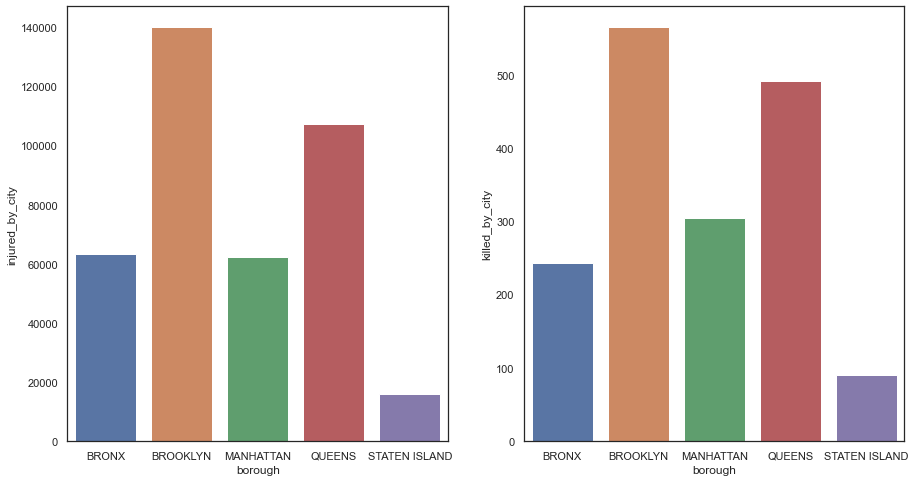

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(x='borough', y='injured_by_city', data=injured_by_city, ax=axes[0])
sns.barplot(x='borough', y='killed_by_city', data=killed_by_city, ax=axes[1])

In [243]:
palette_color = sns.color_palette('bright') 
  
vehicle_type = c3.vehicle_type_code_1.value_counts().nlargest(10)
vehicle_type

Sedan                                  518708
Station Wagon/Sport Utility Vehicle    403456
PASSENGER VEHICLE                      346583
SPORT UTILITY / STATION WAGON          150612
Taxi                                    46548
Pick-up Truck                           30878
TAXI                                    29274
4 dr sedan                              28532
VAN                                     21935
Box Truck                               21888
Name: vehicle_type_code_1, dtype: int64

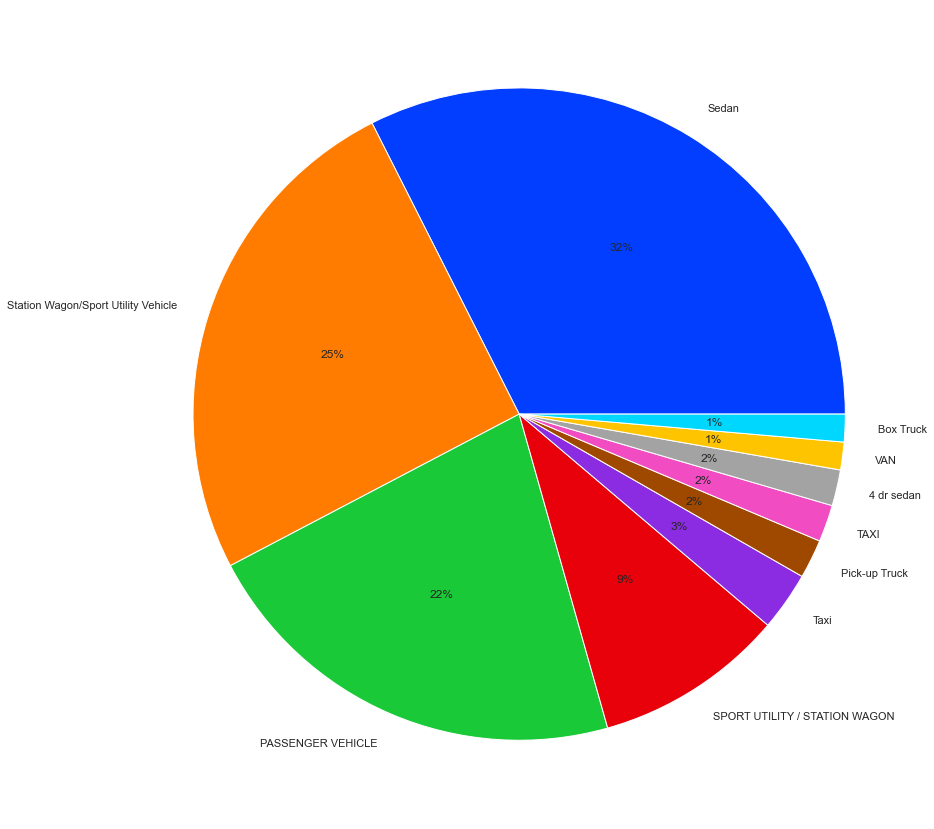

In [244]:
plt.figure(figsize=(15,15))
plt.pie(vehicle_type.values, labels=vehicle_type.index, colors=palette_color, autopct='%.0f%%')
plt.show()

Sedan is the most commonly involved vehicle in an accident, followed by SUV and Passenger vehicle

In [226]:
injuries_by_vehicle = c3.groupby('vehicle_type_code_1')['number_of_persons_injured'].sum().reset_index(name='total_injuries')

injuries_by_vehicle = injuries_by_vehicle.sort_values(by='total_injuries', ascending=False)[:10]
injuries_by_vehicle

,vehicle_type_code_1,total_injuries
921,Sedan,173921.0
941,Station Wagon/Sport Utility Vehicle,131966.0
732,PASSENGER VEHICLE,90310.0
885,SPORT UTILITY / STATION WAGON,38427.0
1008,Taxi,16500.0
130,Bike,11301.0
38,4 dr sedan,7842.0
789,Pick-up Truck,7601.0
958,TAXI,7401.0
1049,UNKNOWN,6624.0


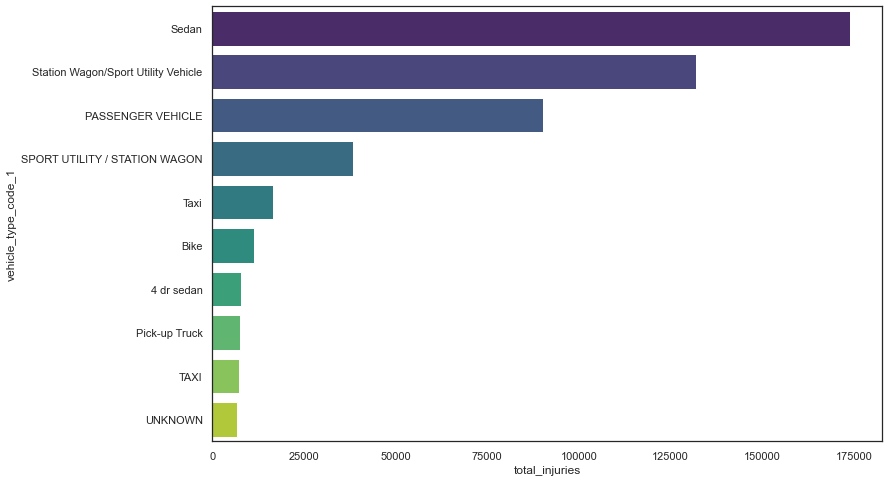

In [227]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_injuries', y='vehicle_type_code_1', data=injuries_by_vehicle, palette='viridis')

In [231]:
deaths_by_vehicle = c3.groupby('vehicle_type_code_1')['number_of_persons_killed'].sum().reset_index(name='total_killed')

deaths_by_vehicle = deaths_by_vehicle.sort_values(by='total_killed', ascending=False)[:10]
deaths_by_vehicle

,vehicle_type_code_1,total_killed
921,Sedan,547.0
941,Station Wagon/Sport Utility Vehicle,510.0
732,PASSENGER VEHICLE,337.0
885,SPORT UTILITY / STATION WAGON,189.0
665,Motorcycle,171.0
623,MOTORCYCLE,69.0
143,Bus,55.0
789,Pick-up Truck,55.0
134,Box Truck,51.0
1049,UNKNOWN,46.0


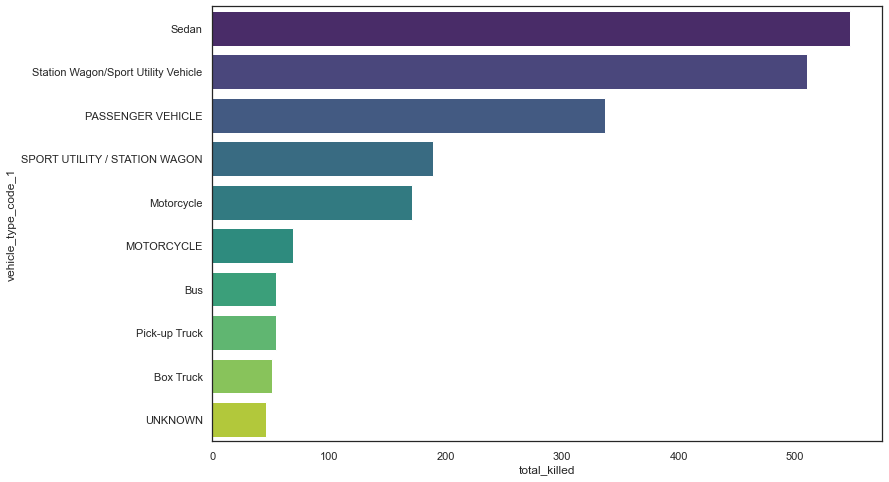

In [229]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_killed', y='vehicle_type_code_1', data=deaths_by_vehicle, palette='viridis')

In [239]:
sedan_injuries = injuries_by_vehicle.iloc[0][1]
sedan_deaths = deaths_by_vehicle.iloc[0][1]

suv_injuries = injuries_by_vehicle.iloc[1][1]
suv_deaths = deaths_by_vehicle.iloc[1][1]

print("sedan death injury ratio ", sedan_deaths/sedan_injuries)
print("sedan death injury ratio ", suv_deaths/suv_injuries)

sedan death injury ratio  0.0031451061113954037
sedan death injury ratio  0.003864631799099768


We can see that the sedan is more involved in accident, thus the injured and killed are more in case of sedan, but we can also see that the number of deaths to injured in sedan is less compared to the deaths to injured ratio of sports utility vehicle

In [241]:
c3.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'crash_datetime', 'day_of_week', 'hour_of_day',
       'is_weekend'],
      dtype='object')

In [249]:
zipcode = c3.zip_code.value_counts().nlargest(20)
zipcode

11207.0    26386
11236.0    18405
11101.0    18273
11203.0    17604
11234.0    17115
11385.0    16896
11208.0    16286
11201.0    16186
11212.0    16160
11226.0    16147
10016.0    16005
11434.0    15698
10019.0    15505
10036.0    15283
10022.0    15138
10001.0    14943
10002.0    14555
11233.0    14245
10013.0    14077
11206.0    13681
Name: zip_code, dtype: int64

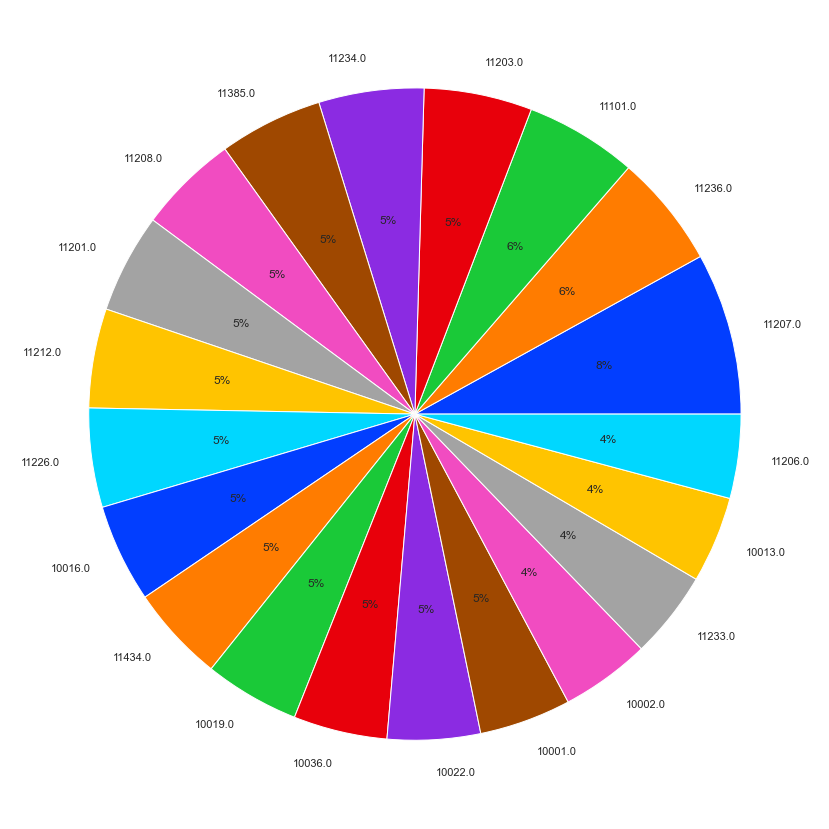

In [250]:
plt.figure(figsize=(15,15))
plt.pie(zipcode.values, labels=zipcode.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [252]:
c3[c3.zip_code==11207].borough.value_counts().index

Index(['BROOKLYN'], dtype='object')

We can see that the area with pincode 11207 recorded more crashes in entire data and that area belong to brooklyn

In [260]:
crashes_by_zip_city = c3.groupby(['borough', 'zip_code']).size().reset_index(name='total_crashes')

max_crashes_by_city = crashes_by_zip_city.loc[crashes_by_zip_city.groupby('borough')['total_crashes'].idxmax()]

max_crashes_by_city = max_crashes_by_city.sort_values(by='total_crashes', ascending=False)

max_crashes_by_city

,borough,zip_code,total_crashes
31,BROOKLYN,11207.0,26386
161,QUEENS,11101.0,18273
83,MANHATTAN,10016.0,16005
16,BRONX,10467.0,13505
229,STATEN ISLAND,10306.0,9548


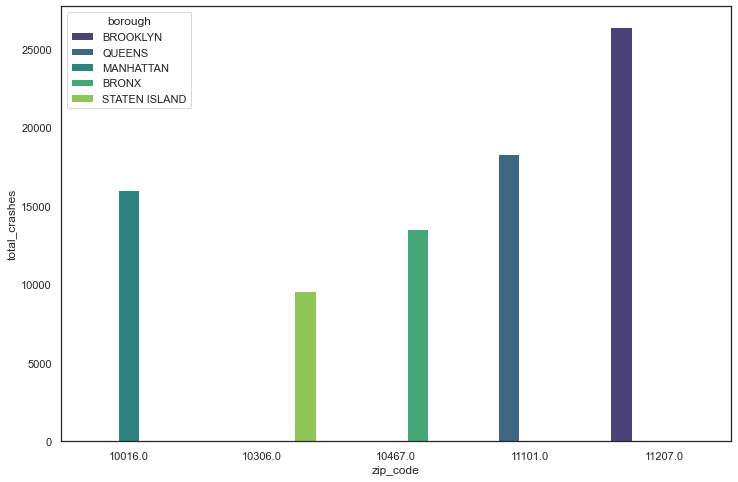

In [261]:
plt.figure(figsize=(12, 8))
sns.barplot(x='zip_code', y='total_crashes', hue='borough', data=max_crashes_by_city, palette='viridis')

The above shows the zipcode with highest crashes in each city

In [262]:
c3.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'crash_datetime', 'day_of_week', 'hour_of_day',
       'is_weekend'],
      dtype='object')

In [263]:
street = c3.on_street_name.value_counts().nlargest(10)
street

BROADWAY                            15827
ATLANTIC AVENUE                     14108
BELT PARKWAY                        12068
3 AVENUE                            11482
NORTHERN BOULEVARD                  10223
LONG ISLAND EXPRESSWAY               9208
BROOKLYN QUEENS EXPRESSWAY           8880
2 AVENUE                             8723
LINDEN BOULEVARD                     8536
GRAND CENTRAL PKWY                   8005
Name: on_street_name, dtype: int64

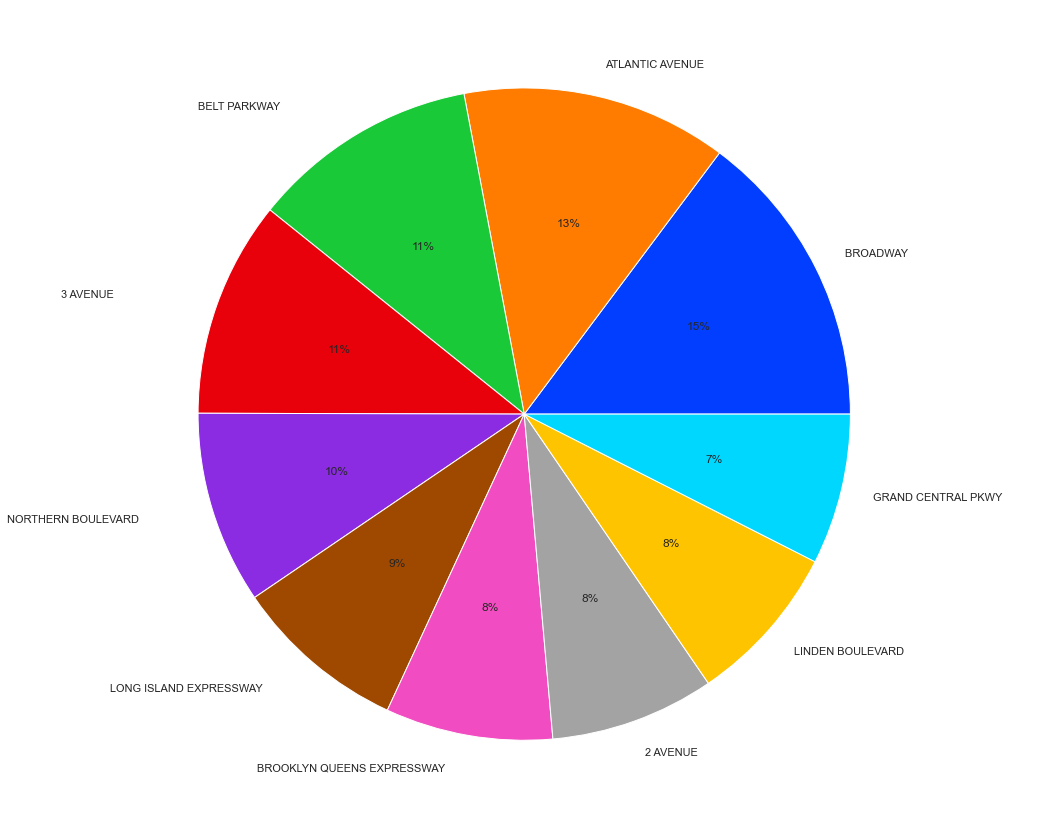

In [264]:
plt.figure(figsize=(15,15))
plt.pie(street.values, labels=street.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [267]:
crashes_by_street_city = c3.groupby(['borough', 'on_street_name']).size().reset_index(name='total_crashes')

max_crashes_by_street_city = crashes_by_street_city.loc[crashes_by_street_city.groupby('borough')['total_crashes'].idxmax()]

max_crashes_by_street_city = max_crashes_by_street_city.sort_values(by='total_crashes', ascending=False)

max_crashes_by_street_city


,borough,on_street_name,total_crashes
2554,BROOKLYN,ATLANTIC AVENUE,9713
9581,QUEENS,NORTHERN BOULEVARD,8449
5229,MANHATTAN,BROADWAY,7152
11389,STATEN ISLAND,HYLAN BOULEVARD,4503
222,BRONX,BRUCKNER BOULEVARD,4134


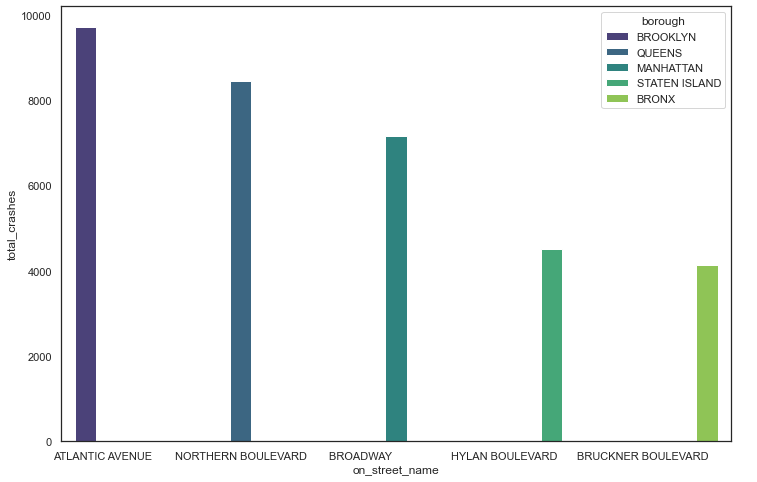

In [269]:
plt.figure(figsize=(12, 8))
sns.barplot(x='on_street_name', y='total_crashes', hue='borough', data=max_crashes_by_street_city, palette='viridis')

In [270]:
c3.columns

Index(['borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'collision_id', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'crash_datetime', 'day_of_week', 'hour_of_day',
       'is_weekend'],
      dtype='object')

In [276]:
crashes_by_location = c3.groupby(['latitude', 'longitude']).size().reset_index(name='total_crashes')

top_locations = crashes_by_location.nlargest(20, 'total_crashes')
top_locations

,latitude,longitude,total_crashes
259557,40.861862,-73.912820,682
26535,40.608757,-74.038086,669
120114,40.696033,-73.984530,645
224152,40.804700,-73.912430,592
120118,40.696035,-73.984529,580
92105,40.675735,-73.896860,542
71423,40.658577,-73.890630,495
200767,40.760601,-73.964314,472
221734,40.798256,-73.827440,461
233401,40.820305,-73.890830,461


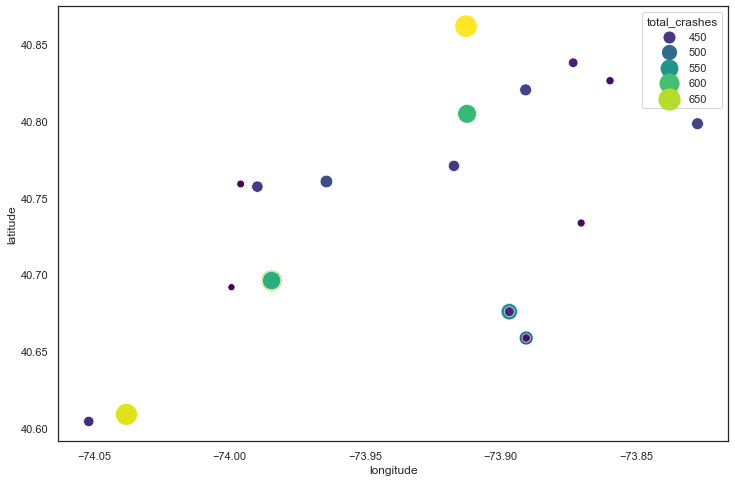

In [277]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', size='total_crashes', data=top_locations, hue='total_crashes', palette='viridis', sizes=(50, 500))

In [278]:
m = folium.Map(location=[top_locations['latitude'].mean(), top_locations['longitude'].mean()], zoom_start=10)

for index, row in top_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Crash Count: {row['total_crashes']}",
    ).add_to(m)

m

These areas show the maximum crashes occuring places, so these can be formed as a black zones and need to take precaution.

In [286]:
numeric_columns = c3.select_dtypes(include='number')

# Generate the correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,hour_of_day,is_weekend
zip_code,1.000000,-0.483396,0.489761,0.052020,0.002931,-0.006190,0.000348,-0.012841,0.000311,0.061492,0.004274,0.068531,0.003404,0.008855
latitude,-0.483396,1.000000,0.324628,-0.015351,-0.001201,0.004848,-0.000874,-0.000549,-0.000541,-0.017990,-0.000777,0.009767,-0.013743,0.002797
longitude,0.489761,0.324628,1.000000,0.035577,0.002247,-0.012695,0.000297,-0.036487,-0.001566,0.052031,0.003964,0.055169,-0.007241,0.016641
number_of_persons_injured,0.052020,-0.015351,0.035577,1.000000,0.015707,0.276722,0.003239,0.179130,-0.000939,0.906019,0.021144,0.057058,0.019332,0.024133
number_of_persons_killed,0.002931,-0.001201,0.002247,0.015707,1.000000,0.007085,0.691809,-0.003979,0.283963,0.015236,0.662877,0.004021,-0.006587,0.005052
number_of_pedestrians_injured,-0.006190,0.004848,-0.012695,0.276722,0.007085,1.000000,0.012976,-0.032873,0.000665,-0.064016,-0.002743,-0.014851,0.030648,-0.016636
number_of_pedestrians_killed,0.000348,-0.000874,0.000297,0.003239,0.691809,0.012976,1.000000,-0.002921,0.024719,-0.000440,0.005650,0.000145,-0.001301,0.000338
number_of_cyclist_injured,-0.012841,-0.000549,-0.036487,0.179130,-0.003979,-0.032873,-0.002921,1.000000,0.001985,-0.052642,-0.003674,0.027958,0.038777,-0.000259
number_of_cyclist_killed,0.000311,-0.000541,-0.001566,-0.000939,0.283963,0.000665,0.024719,0.001985,1.000000,-0.001690,-0.000231,0.002952,-0.000361,-0.000065
number_of_motorist_injured,0.061492,-0.017990,0.052031,0.906019,0.015236,-0.064016,-0.000440,-0.052642,-0.001690,1.000000,0.024507,0.053852,-0.001619,0.031712


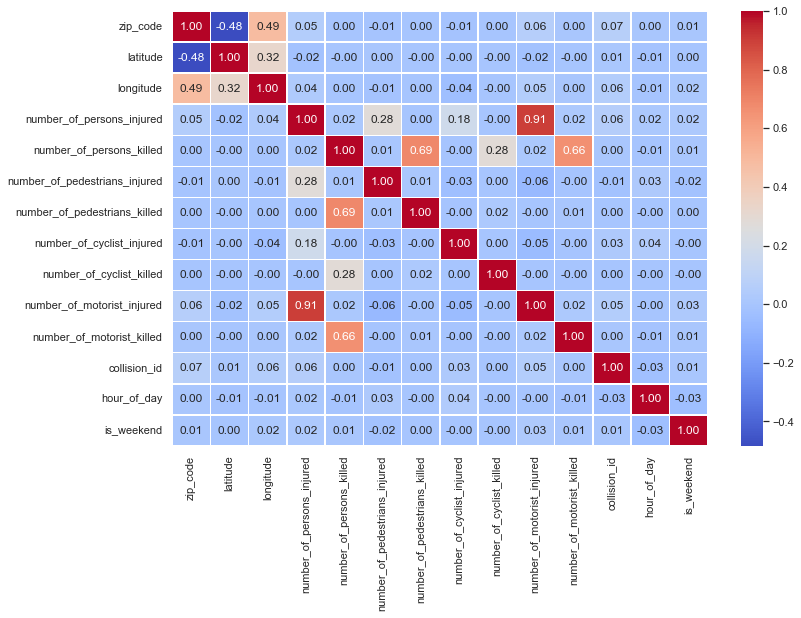

In [288]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

The correlation matrix shows the relation between various columns in the data.

1. What are the main time during day at which crashes occur
- During weekends, the number of crashes increases from 9am and then they continue till midnight, thus indicating that weekend the night traffic is significantly invlved in crashes

- During weekdays, the number of crashes increases from 8am and till evening, at night the number of crashes reduces.

2. which days of week are the major cause of accidents
- All the days of week have almost same amount of crashes, but the deaths are more at weekends than in weekdays 

3. Relation between injury and death with time during car crash
- During weekends, the deaths are more during night and early morning hours when the traffic is less, the  injuries are contrary, they are more during day and less during night and early morning hours
- During weekdays, the deaths are more during night and early morning, the injuries are contrary and are more in the mornings and less at night and early morning

4. which car model involves more in the crashes
- Sedan  
- SUV

5. which city has more car crashes
- Brooklyn

6. which region has more crashes
- The plots are provided for the regions street wise as well as zip_cpde wise

7. Map the hotspot where the majority of accidents occur
- The above map indicates the hotspot zones for the crashes and can be used to prevent the increase of crashes in these areas.